In [640]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot as up

In [641]:
tower2p1_events=pd.read_csv("pulse_out/Tower2p1_event_info.csv") #contains reconstruction information
pulses_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['samples'] #pulses
event_nums_tower2p1=up.concatenate(["pulse_out/Run352044_tower2p1.root:tree"],library='np')['event_number'] #event numbers to connect pulses to reconstruction info

ADC2mV=8.0108642578125e-02 ##this number should be checked with up-to-date front end board readings, but is fine for now

In [642]:
tower2p1_events

,Channel,Time,CoincTime,NumPulses,OFdelay,OFChi2,Energy,Baseline,MaxToBaseline,Run,PCANorm,event_number,BaselineSlope,SingleTrigger
0,54,1018.808,1015.720415,1,3.119665,3.511851,2617.897933,-5949.946025,1135.256388,352044,4.796232,81146,-0.004776,False
1,53,1029.120,1026.040443,1,3.119646,959.445237,1291.883245,-3041.182805,616.774846,352044,16.963644,81911,-0.000647,True
2,58,1056.312,1053.235369,1,3.086841,10.635230,2600.413432,-3019.474859,1154.465551,352044,14.263034,84090,-0.004409,True
3,55,1060.072,1057.011309,1,3.070154,0.177860,737.921289,-3309.880651,198.861516,352044,10.408411,84367,-0.002333,True
4,56,1067.584,1064.502041,1,3.122515,1.473148,1424.047190,-2917.889409,584.885412,352044,1.821491,85011,-0.000906,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24858,59,128172.264,128169.191868,1,3.090579,8.643130,2336.963051,-4723.471242,1099.356252,352044,11.374310,10152655,-0.002778,True
24859,64,128188.112,128185.029504,1,3.123739,0.686072,825.788777,-6597.101735,357.279348,352044,-0.920750,10153787,-0.002088,True
24860,62,128193.784,128190.698521,1,3.115107,1.280897,1114.787370,-3414.805634,669.562561,352044,-0.708036,10154324,-0.001870,True
24861,61,128194.640,128191.566482,1,3.092249,2.601401,662.462041,-4403.333359,308.580093,352044,-0.435548,10154390,-0.000717,True


In [643]:
CHANNEL=60 #hard-coding this for now...

In [644]:
file=open("average_pulse_dump/Channel00"+str(CHANNEL)+"_AveragePulse.txt")
for line in file:
    parse=line.replace("fData  ","")
    parse=parse.replace("\n","")
    splits=parse.split(" ")
    avg_pulse=np.array(splits,dtype=float)
    break

cleaned_avg_pulse=(avg_pulse-np.mean(avg_pulse[0:50]))/np.max(avg_pulse-np.mean(avg_pulse[0:50]))

Text(0, 0.5, 'Pulse Amplitude: Correlates to E')

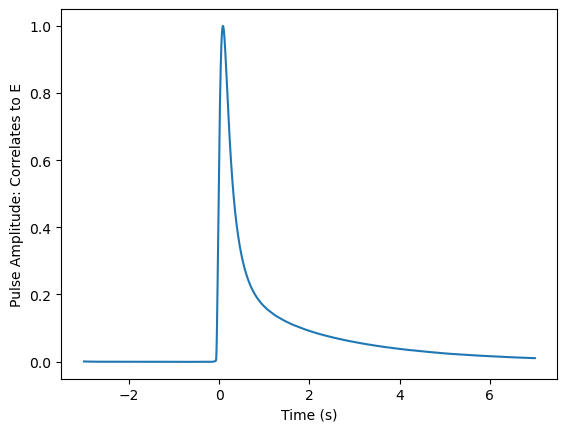

In [645]:
#check out what normalized average pulse for channel 60 is

fully_sampled_times=np.linspace(-3,7,10000) #seconds

plt.plot(fully_sampled_times,cleaned_avg_pulse)

plt.xlabel("Time (s)")
plt.ylabel("Pulse Amplitude: Correlates to E")

In [646]:
THIS_PULSE=8272 #pulse we'll focus on, to get nODE working

In [647]:
#check info on it...

#how to pass back & forth between event number & pulse id...
tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]]

,Channel,Time,CoincTime,NumPulses,OFdelay,OFChi2,Energy,Baseline,MaxToBaseline,Run,PCANorm,event_number,BaselineSlope,SingleTrigger
8272,60,43488.616,43485.538606,1,3.079257,4.561317,1123.404947,-4594.086314,390.785838,352044,0.430006,3448536,0.001447,True


In [648]:
THIS_ENERGY=tower2p1_events[tower2p1_events['event_number']==event_nums_tower2p1[THIS_PULSE]].iloc[0]['Energy']

1123.4049474985482  keV


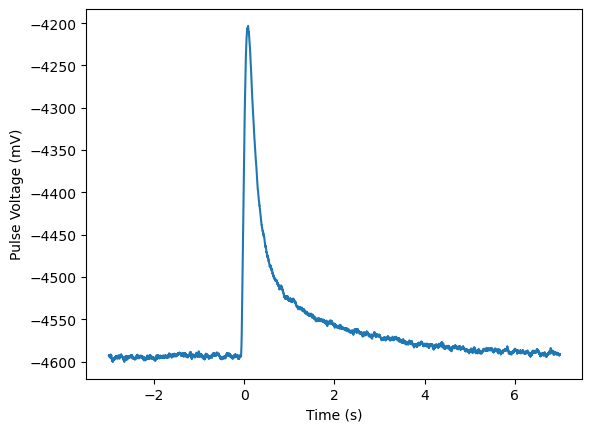

In [649]:
plt.plot(np.linspace(-3,7,10000),ADC2mV*pulses_tower2p1[THIS_PULSE])

plt.xlabel("Time (s)")
plt.ylabel("Pulse Voltage (mV)")

print(THIS_ENERGY, " keV")

1123.4049474985482  keV


(-0.1, 0.1)

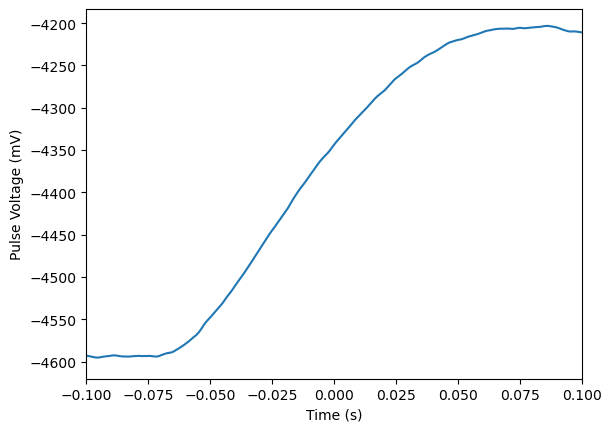

In [650]:
plt.plot(np.linspace(-3,7,10000),ADC2mV*pulses_tower2p1[THIS_PULSE])

plt.xlabel("Time (s)")
plt.ylabel("Pulse Voltage (mV)")

print(THIS_ENERGY, " keV")

plt.xlim([-0.1,0.1])

In [651]:
### feel free to normalize the pulse, e.g. correct for the baseline offset, and make overall amplitude ~0.5

###can start by setting initial condition at time 0, but we should think about how to fine-tune for small time offsets:
### could be grid-search, add differentiable parameter
# this will also be easier when we move beyond 1 pulse to fitting many pulses simulatenously

#initial conditions: should be (0, Energy, 0)
#                               ^    ^     ^
#                               |    |     |
#                               |    |     \- this variable is an extra with no clear interpretation, but can assist in modelling
#                               |    \- this variable models the energy: has initial condition from calibration
#                               \- this variable models the observed pulse, and is the only one entering into the loss
#start off with just our usual MSE-loss between predicted and observed

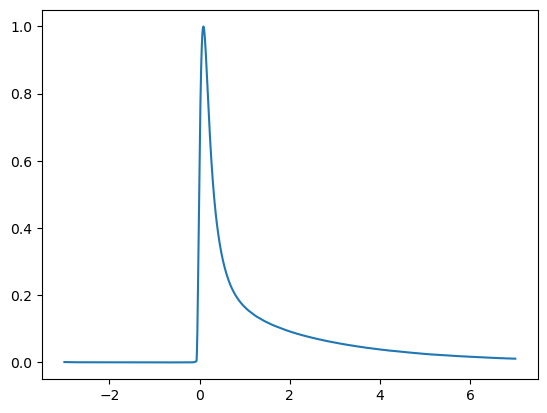

In [716]:
fully_sampled_times=np.linspace(-3,7,10000) #seconds

plt.plot(fully_sampled_times,cleaned_avg_pulse)

In [717]:
df = pd.DataFrame({"Times": fully_sampled_times, "Energy": cleaned_avg_pulse })
df

,Times,Energy
0,-3.000,0.000111
1,-2.999,0.000111
2,-2.998,0.000111
3,-2.997,0.000137
4,-2.996,0.000111
...,...,...
9995,6.996,0.010049
9996,6.997,0.010049
9997,6.998,0.010049
9998,6.999,0.010023


In [718]:
import numpy as np 
import pandas as pd 

import optax
import matplotlib.pyplot as plt
from typing import List
import equinox as eqx
import jax
import jax.numpy as jnp
import time

import diffrax
import equinox as eqx  # https://github.com/patrick-kidger/equinox
import jax
import jax.nn as jnn
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax

In [734]:
energies = jnp.array(df["Energy"])
time = jnp.array(df["Times"])

In [735]:
time = time[2900:]
energies = energies[2900:]

In [736]:
time[-1]

Array(7., dtype=float32)

In [737]:
length = len(energies)
z_s = np.linspace(0, 4, length)

In [754]:
class LinearFunction(eqx.Module):
    layers: list

    def __init__(self, key): 
        key1, key2, key3, key4, key5, key6, key7 = jax.random.split(key, 7)
        self.layers = [eqx.nn.Linear(3,16, key = key1), 
                       eqx.nn.Linear(16, 3, key = key2)] 
    def __call__(self, t, y, *args):
       # print("DEBUG", t,y)
        for layer in self.layers[:-1]:
            y = jax.nn.tanh(layer(y))
        y = self.layers[-1](y)

       # print("DEBUG2", y)
        return y

In [859]:
vars = [0.0, 9.5, 0]

In [860]:
def model_to_loss(model, y_s, z_s, t_s):
    # Solve the differential equation
    
   # print(type(t_s))
    #print("MODELTOLOSS", y_s[0], z_s[0], t_s[len[t_s]])
    solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(model),
        diffrax.Tsit5(),
        t0=float(t_s[0]),
        t1=float(t_s[-1]),
        dt0=0.009,
        y0=jnp.array(vars, dtype=jnp.float64),  
        stepsize_controller=diffrax.PIDController(rtol=1e-3, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(t_s)),
    )
    

    # Extract solutions for y and z
    y = solutions.ys[:length-1, 0]
    a =  solutions.ys[:length-1, 1]
    b =  solutions.ys[:length-1, 2]
     
   # print(y)

    
    # Use nan_to_num to handle NaNs
    y = jnp.nan_to_num(y, nan=0.0)
   
   
    # Calculate squared differences for the loss
    y_diff = ((y - y_s[:length-1]) ** 2)
    #z_diff = (z - z_s[:N_SAMPLES-1]) ** 2
   # print(jnp.mean(y_diff) + jnp.mean(z_diff))
    return jnp.sqrt(jnp.mean(y_diff))

In [ ]:
model_to_loss_and_grad = eqx.filter_value_and_grad(model_to_loss)
opt = optax.sgd(0.009) 
key = jax.random.PRNGKey(41)
key, subkey = jax.random.split(key, 2)


def make_step(m, opt_s, y_s, z_s, t_s):
    loss, grad = model_to_loss_and_grad(eqx.filter(m, eqx.is_inexact_array), y_s, z_s, t_s)
    updates, opt_s = opt.update(grad, opt_s, m)
    m = eqx.apply_updates(m, updates)
    return m, opt_s, loss

loss_history = []
MODEL = LinearFunction(subkey)
opt_state = opt.init(eqx.filter(MODEL, eqx.is_array))
for epoch in range(35000):
    MODEL, opt_state, loss = make_step(MODEL, opt_state, energies, z_s, time)
    loss_history.append(loss)

    
    print(f"Epoch {epoch}, loss {loss}")


/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_50935/2130885974.py:12: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  y0=jnp.array(vars, dtype=jnp.float64),


Epoch 0, loss 4.884653091430664
Epoch 1, loss 2.5251898765563965
Epoch 2, loss 0.4655793607234955
Epoch 3, loss 1.4442418813705444
Epoch 4, loss 0.6682931780815125
Epoch 5, loss 1.3048731088638306
Epoch 6, loss 0.742371678352356
Epoch 7, loss 1.2204396724700928
Epoch 8, loss 0.782076895236969
Epoch 9, loss 1.1637879610061646
Epoch 10, loss 0.8031553626060486
Epoch 11, loss 1.123455286026001
Epoch 12, loss 0.8127652406692505
Epoch 13, loss 1.0933258533477783
Epoch 14, loss 0.815021812915802
Epoch 15, loss 1.0699098110198975
Epoch 16, loss 0.8122935891151428
Epoch 17, loss 1.0508750677108765
Epoch 18, loss 0.8063283562660217
Epoch 19, loss 1.0346170663833618
Epoch 20, loss 0.7983621954917908
Epoch 21, loss 1.0202462673187256
Epoch 22, loss 0.7891383171081543
Epoch 23, loss 1.0068458318710327
Epoch 24, loss 0.7792679071426392
Epoch 25, loss 0.9939250946044922
Epoch 26, loss 0.7691773772239685
Epoch 27, loss 0.9812657833099365
Epoch 28, loss 0.7591214179992676
Epoch 29, loss 0.968611419200

In [862]:
time

Array([-0.09970997, -0.09870987, -0.09770977, ...,  6.9979997 ,
        6.999     ,  7.        ], dtype=float32)

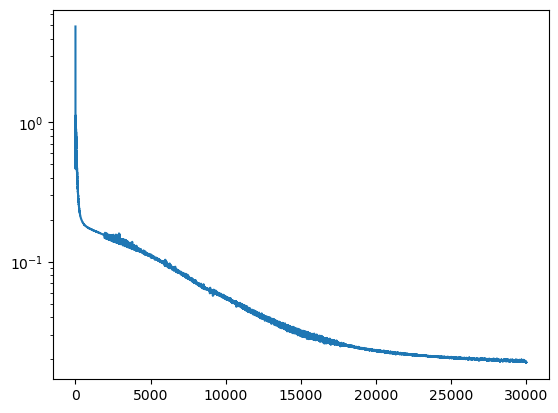

In [863]:
plt.plot(loss_history)
plt.yscale('log')

In [ ]:
solutions = diffrax.diffeqsolve(
        diffrax.ODETerm(MODEL),
        diffrax.Tsit5(),
        t0=float(time[0]),
        t1=float(time[-1]),
        dt0=0.005,
        y0=jnp.array(vars, dtype=jnp.float64),  
        stepsize_controller=diffrax.PIDController(rtol=1e-3, atol=1e-6),
        saveat=diffrax.SaveAt(ts=jnp.sort(time)),
    )
solutions.ys[:, 0]

/var/folders/wr/p4g_vhcn34g6101bsy9rmsd40000gn/T/ipykernel_50935/1539223643.py:7: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  y0=jnp.array(vars, dtype=jnp.float64),


Array([0.        , 0.0062755 , 0.01255033, ..., 0.01342644, 0.01342866,
       0.01343089], dtype=float32)

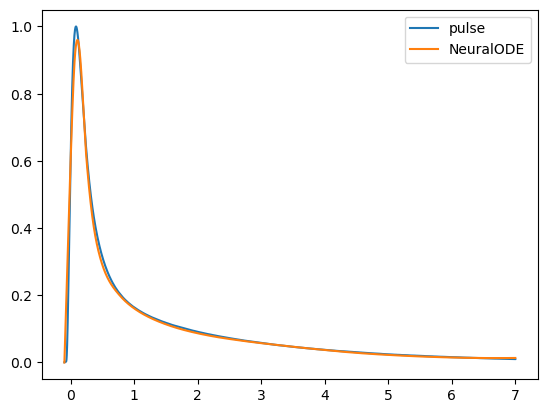

In [865]:
plt.plot(time, energies, label = "pulse")
plt.plot(time, solutions.ys[:, 0], label = "NeuralODE")
plt.legend()

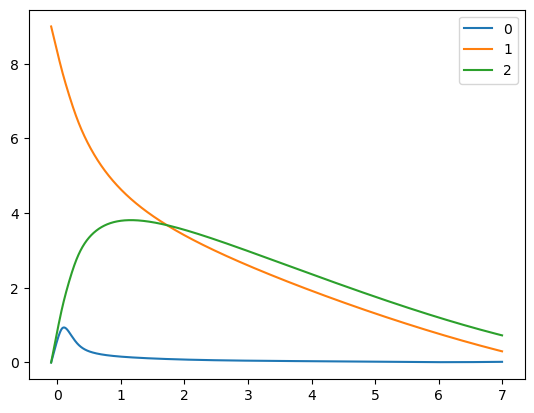

In [858]:
plt.plot(time, solutions.ys[:, 0], label = "0")
plt.plot(time, solutions.ys[:, 1], label = "1")
plt.plot(time, solutions.ys[:, 2], label = "2")


plt.legend()

(-0.1, 10.0)

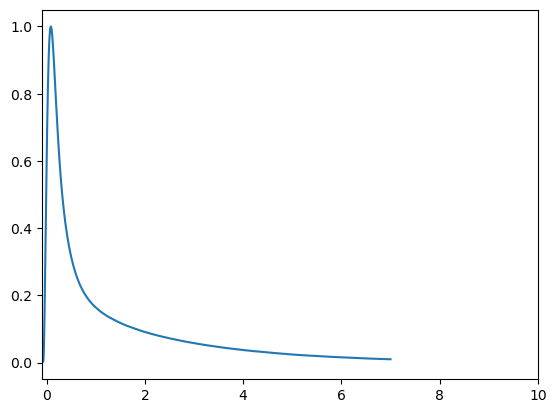

In [820]:
plt.plot(time, energies)
plt.xlim(-0.1, 10)